<a href="https://colab.research.google.com/github/SadehYuval/MiniProjectDataManagment/blob/main/MiniProjectDataManagment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def algorithm_1(items, K, num_categories, lower_constraints, upper_constraints):
    counter = 0
    # Initialize the output list L
    L = []

    # Initialize the counts of per-category selected items C
    C = [0] * num_categories

    slack = K - sum(lower_constraints)

    while len(L) < K:
        x = items[counter]
        counter += 1
        i = x.category
        # Check if the lower constraint is satisfied for category i
        if C[i] < lower_constraints[i]:
            L.append(x)
            C[i] += 1
        # Check if upper constraint can be relaxed
        elif C[i] < upper_constraints[i] and slack > 0:
            L.append(x)
            C[i] += 1
            slack -= 1

    return L



In [130]:
import heapq
import math

def algorithm_2(items, K, N, num_categories, lower_constraints, upper_constraints, items_per_category):

    L = []

    # Array holding how many items we accepted from each category
    C = [0] * num_categories

    # Array holding how many items we've seen from each category
    M = [0] * num_categories

    # Per category warmup
    R = [math.floor((n / math.e) / 16) for n in items_per_category]

    T = [[] for _ in range(num_categories)]

    slack = K - sum(lower_constraints)

    # Independent warmup
    r = math.floor((N / math.e) / 16)

    T_independent = []

    def num_feasible_items():
      return sum(items_per_category[i] - M[i] for i in range(len(items_per_category)))

    counter = 0

    while len(L) < K and counter < len(items):
        x = items[counter]
        counter += 1
        i = x.category

        # Check if category-independent warm-up is needed
        if sum(M) < r:
            if len(T_independent) < slack:
              heapq.heappush(T_independent, x)
            elif slack != 0 and T_independent[0].score < x.score:
              heapq.heappop(T_independent)
              heapq.heappush(T_independent, x)

        # Check if category-specific warm-up is needed
        if M[i] < R[i]:
            if len(T[i]) < lower_constraints[i]:
              heapq.heappush(T[i], x)
            elif T[i][0].score < x.score:
              heapq.heappop(T[i])
              heapq.heappush(T[i], x)

        elif (C[i] < lower_constraints[i] and ((T[i] and x.score > T[i][0].score) or (not T[i]))) or (items_per_category[i] - M[i] == lower_constraints[i] - C[i]):
            if T[i]:
              heapq.heappop(T[i])
            L.append(x)
            C[i] += 1
        elif (sum(M) >= r and slack > 0 and x.score > T_independent[0].score and C[i] < upper_constraints[i] ):
            heapq.heappop(T_independent)
            L.append(x)
            C[i] += 1
            slack -= 1
        elif C[i] < upper_constraints[i] and num_feasible_items() == K - len(L):
            L.append(x)
            C[i] += 1
            slack -= 1

        # Increment the count of seen items for the category
        M[i] += 1

    return (L, counter - 1)


In [19]:
import heapq
import math

def algorithm_3(items, K, N, num_categories, lower_constraints, upper_constraints, items_per_category):
    L = []

    D = [[] for _ in range(num_categories)]

    C = [0] * num_categories

    M = [0] * num_categories

    R = [math.floor((n / math.e) / 8) for n in items_per_category]

    T = [[] for _ in range(num_categories)]

    # Initialize the number of unsatisfied categories
    u = num_categories - sum(1 for i in range(num_categories) if lower_constraints[i] == 0)

    # w - Number of deferred items overall
    w = 0
    counter = 0

    while ((u > 0) or (w < K)) and counter < len(items):
        x = items[counter]
        counter += 1
        i = x.category

        if M[i] < R[i]:
            if len(T[i]) < lower_constraints[i]:
              heapq.heappush(T[i], x)
            elif lower_constraints[i] > 0 and T[i][0].score < x.score:
              heapq.heappop(T[i])
              heapq.heappush(T[i], x)
        elif ((not T[i]) or ((C[i] < lower_constraints[i]) and T[i] and x.score > T[i][0].score)):
            C[i] += 1
            if T[i]:
              heapq.heappop(T[i])
            if (lower_constraints[i] > 0) and (C[i] == lower_constraints[i]):
                u -= 1

        # Add the item to its category's deferred list if its score is higher than the minimum element
        if len(D[i]) < upper_constraints[i]:
            heapq.heappush(D[i], x)
        # In the case the list has reached it's maximum capacity, replace the minimum if the current score is higher
        elif x.score > D[i][0].score:
            heapq.heappop(D[i])
            heapq.heappush(D[i], x)

        M[i] += 1

        # Update the total number of deferred items
        w = sum(len(D[i]) for i in range(num_categories))

    # Create a sorted list from the total deferred items
    W = []
    for i in range(num_categories):
        W.extend(D[i])

    W.sort(key=lambda x: x.score, reverse=True)


    # Compute L with Algorithm 1 on W (sorted by score)
    L = algorithm_1(W, K, num_categories, lower_constraints, upper_constraints)

    return (L, counter - 1)



In [14]:
import heapq
class Item:
    def __init__(self, category, score, name):
        self.category = category
        self.score = score
        self.name = name

    def __lt__(self, other):
        return self.score < other.score

    def __le__(self, other):
        return self.score <= other.score

    def __eq__(self, other):
        return self.score == other.score

    def __ne__(self, other):
        return self.score != other.score

    def __gt__(self, other):
        return self.score > other.score

    def __ge__(self, other):
        return self.score >= other.score

items_list = [
    Item(category=0, score=6, name='A'),
    Item(category=1, score=4, name='B'),
    Item(category=0, score=1, name='C'),
    Item(category=0, score=8, name='D'),
    Item(category=1, score=2, name='E'),
    Item(category=0, score=3, name='F'),
    Item(category=1, score=1, name='G'),
    Item(category=0, score=2, name='H'),
    Item(category=1, score=9, name='I'),
    Item(category=1, score=5, name='J'),
    Item(category=0, score=7, name='K'),
    Item(category=1, score=5, name='L')
]

# algorithm_2(items, K, N, num_categories, lower_constraints, upper_constraints, items_per_category)
output1 = algorithm_3(items_list, 3, 12, 2, [1, 1], [2, 2], [6, 6])
output = output1[0]
for item in output:
  print(item.score)


6
4
1


In [20]:
import pandas as pd
import random

data_set1 = pd.read_csv("Forbes_2023_Mini.csv")
data_set1 = data_set1.sort_values(by="ranking")  # Sort by Rank in ascending order (richest first)
top_526 = data_set1.head(526)
forbes_richest = []

accepted_countries = {"Germany": 0 , "United States": 1, "China": 2, "Russia": 3 , "Other": 4}
for i in range(526):
  curr_item = Item(top_526.iloc[i].country, top_526.iloc[i].netWorth,  top_526.iloc[i].personName)
  if top_526.iloc[i].country not in accepted_countries:
    curr_item.category = "Other"

  curr_item.category = accepted_countries[curr_item.category]
  forbes_richest.append(curr_item)


GERMANY = 21
USA = 197
CHINA = 76
RUSSIA = 17
OTHER = 215


for i in range(3):
  random.shuffle(forbes_richest)
  output2 = algorithm_3(forbes_richest, 20, 526, 5, [4, 4, 4, 4, 4], [4, 4, 4, 4, 4], [GERMANY, USA, CHINA, RUSSIA, OTHER])
  list2 = output2[0]
  for item in list2:
    print(item.name)

  print("===========================================")

data_set2 = pd.read_csv("astronauts_Mini.csv")
data_set2 = data_set2.sort_values(by="SpaceFlightHours", ascending=False)  # Sort by flight hours in descending order (highest first)
top_357 = data_set2.head(357)
astronauts = []

accepted_majors = {"Physics": 0 , "Aerospace Engineering": 1, "Mechanical Engineering": 2, "Aeronautical Engineering": 3 , "Electrical Engineering": 4, "Engineering Science": 5, "Engineering": 6, "Mathematics": 7, "Chemistry": 8, "Other": 9}
for i in range(357):
  curr_item = Item(top_357.iloc[i].UndergraduateMajor, top_357.iloc[i].SpaceFlightHours,  top_357.iloc[i].personName)
  if top_357.iloc[i].UndergraduateMajor not in accepted_majors:
    curr_item.category = "Other"

  curr_item.category = accepted_majors[curr_item.category]
  astronauts.append(curr_item)


PHYSICS = 36
AEROSPACEENGINEERING = 33
MECHANICALENGINEERING = 31
AERONAUTICALENGINEERING = 28
ELECTRICALENGINEERING = 24
ENGINEERINGSCIENCE = 13
ENGINEERING = 12
MATHEMATICS = 12
CHEMISTRY = 11
OTHER = 157
fields_list = [PHYSICS, AEROSPACEENGINEERING, MECHANICALENGINEERING, AERONAUTICALENGINEERING, ELECTRICALENGINEERING, ENGINEERINGSCIENCE, ENGINEERING, MATHEMATICS, CHEMISTRY, OTHER]


for i in range(3):
  random.shuffle(astronauts)
  output2 = algorithm_3(astronauts, 30, 357, 10, [3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3], fields_list)
  list2 = output2[0]
  for item in list2:
    print(item.name)
  print("===========================================")

Elon Musk
Jeff Bezos
Bill Gates
Michael Bloomberg
Mukesh Ambani
Francoise Bettencourt Meyers & family
Zhong Shanshan
Zhang Yiming
Li Ka-shing
Ma Huateng
Mark Mateschitz
Robin Zeng
Reinhold Wuerth & family
Stefan Quandt
Leonid Mikhelson & family
Vagit Alekperov
Theo Albrecht, Jr. & family
Thomas Struengmann & family
Suleiman Kerimov & family
Viktor Rashnikov
Bernard Arnault & family
Warren Buffett
François Pinault & family
Giovanni Ferrero
Tadashi Yanai & family
Alain Wertheimer
Reinhold Wuerth & family
Jim Simons
Vladimir Lisin
Leonid Mikhelson & family
Eric Li
Wang Chuanfu
Gennady Timchenko
Karl Albrecht Jr. & family
Robert Pera
Sun Piaoyang
Wang Xing
Michael Otto
Hasso Plattner & family
Andrei Skoch & family
Elon Musk
Mark Zuckerberg
Charles Koch & family
Jim Walton
Giovanni Ferrero
Susanne Klatten
William Ding
Low Tuck Kwong
Stefan Quandt
He Xiangjian & family
James Ratcliffe
Takemitsu Takizaki
Gennady Timchenko
Karl Albrecht Jr. & family
Jiang Rensheng & family
Dang Yanbao
Thomas S

In [38]:
data_set1 = pd.read_csv("Forbes_2023_Mini.csv")
data_set1 = data_set1.sort_values(by="ranking")  # Sort by Rank in ascending order (richest first)
top_526 = data_set1.head(526)
forbes_richest = []


accepted_countries = {"Germany": 0 , "United States": 1, "China": 2, "Russia": 3 , "Other": 4}
for i in range(526):
  curr_item = Item(top_526.iloc[i].country, top_526.iloc[i].netWorth,  top_526.iloc[i].personName)
  if top_526.iloc[i].country not in accepted_countries:
    curr_item.category = "Other"

  curr_item.category = accepted_countries[curr_item.category]
  forbes_richest.append(curr_item)


GERMANY = 21
USA = 197
CHINA = 76
RUSSIA = 17
OTHER = 215


algo1_minimum = algorithm_1(forbes_richest, 20, 5, [1, 1, 1, 1, 1], [1, 1, 1, 1, 16])
algo1_average = algorithm_1(forbes_richest, 20, 5, [4, 4, 4, 4, 4], [4, 4, 4, 4, 4])
algo1_proportion = algorithm_1(forbes_richest, 20, 5, [0, 7, 2, 0, 8], [1, 8, 3, 1, 9])
algo1_relaxed_average = algorithm_1(forbes_richest, 20, 5, [0, 0, 0, 0, 0], [21, 197, 76, 17, 215])
sum_min = 0
sum_average = 0
sum_proportion = 0
sum_relaxed_average = 0
walking_distance_min = []
walking_distance_average = []
walking_distance_proportion = []
walking_distance_relaxed_average= []
accuracy_axis_y_min = []
accuracy_axis_y_average = []
accuracy_axis_y_proportion = []
accuracy_axis_y_relaxed_average= []

for i in range(20):
  sum_min += algo1_minimum[i].score
  sum_average += algo1_average[i].score
  sum_proportion += algo1_proportion[i].score
  sum_relaxed_average += algo1_relaxed_average[i].score

for i in range(100):
  random.shuffle(forbes_richest)
  minimum_combined = algorithm_3(forbes_richest, 20, 526, 5, [1, 1, 1, 1, 1], [1, 1, 1, 1, 16], [GERMANY, USA, CHINA, RUSSIA, OTHER])
  average_combined = algorithm_3(forbes_richest, 20, 526, 5, [4, 4, 4, 4, 4], [4, 4, 4, 4, 4], [GERMANY, USA, CHINA, RUSSIA, OTHER])
  proportion_combined = algorithm_3(forbes_richest, 20, 526, 5, [0, 7, 2, 0, 8], [1, 8, 3, 1, 9], [GERMANY, USA, CHINA, RUSSIA, OTHER])
  relaxed_average_combined = algorithm_3(forbes_richest, 20, 526, 5, [0, 0, 0, 0, 0], [10, 10, 10, 10, 10], [GERMANY, USA, CHINA, RUSSIA, OTHER])
  minimum = minimum_combined[0]
  average = average_combined[0]
  proportion = proportion_combined[0]
  relaxed_average = relaxed_average_combined[0]
  walking_distance_min.append(minimum_combined[1])
  walking_distance_average.append(average_combined[1])
  walking_distance_proportion.append(proportion_combined[1])
  walking_distance_relaxed_average.append(relaxed_average_combined[1])

  min_minimum = 0
  min_average = 0
  min_proportion = 0
  min_relaxed_average = 0
  sum_algo3_minimum = 0
  sum_algo3_average = 0
  sum_algo3_proportion = 0
  sum_algo3_relaxed_average = 0
  for i in range(20):
    min_minimum = min(minimum[i].score, min_minimum)
    min_average = min(average[i].score, min_average)
    min_proportion = min(proportion[i].score, min_proportion)
    min_relaxed_average = min(relaxed_average[i].score, min_relaxed_average)
    sum_algo3_minimum += minimum[i].score
    sum_algo3_average += average[i].score
    sum_algo3_proportion += proportion[i].score
    sum_algo3_relaxed_average += relaxed_average[i].score

  accuracy_minimum = (sum_algo3_minimum - 20 * min_minimum) / (sum_min - 20 * min_minimum)
  accuracy_average = (sum_algo3_average - 20 * min_average) / (sum_average - 20 * min_average)
  accuracy_proportion = (sum_algo3_proportion - 20 * min_proportion) / (sum_proportion - 20 * min_proportion)
  accuracy_relaxed_average = (sum_algo3_relaxed_average - 20 * min_relaxed_average) / (sum_relaxed_average - 20 * min_relaxed_average)

  accuracy_axis_y_min.append(accuracy_minimum)
  accuracy_axis_y_average.append(accuracy_average)
  accuracy_axis_y_proportion.append(accuracy_proportion)
  accuracy_axis_y_relaxed_average.append(accuracy_relaxed_average)





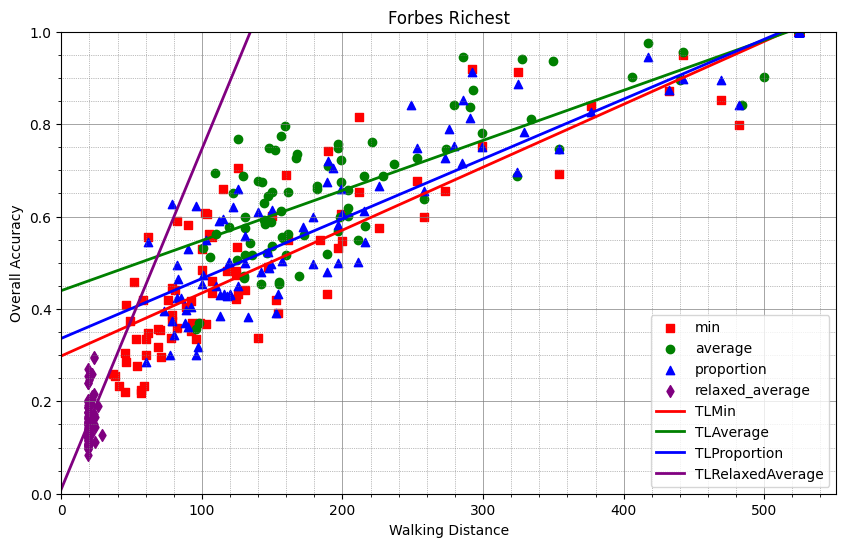

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Create a plot
plt.figure(figsize=(10, 6))

# Plot each scatter plot with different shapes
plt.scatter(walking_distance_min, accuracy_axis_y_min, label='min', color='red', marker='s')
plt.scatter(walking_distance_average, accuracy_axis_y_average, label='average', color='green', marker='o')
plt.scatter(walking_distance_proportion, accuracy_axis_y_proportion, label='proportion', color='blue', marker='^')
plt.scatter(walking_distance_relaxed_average, accuracy_axis_y_relaxed_average, label='relaxed_average', color='purple', marker='d')

# Plot trend lines
coefficients_min = np.polyfit(walking_distance_min, accuracy_axis_y_min, 1)
trend_line_min = np.poly1d(coefficients_min)
x_range_min = np.linspace(0, max(walking_distance_min), 2)
plt.plot(x_range_min, trend_line_min(x_range_min), label='TLMin', color='red', linewidth=2)

coefficients_average = np.polyfit(walking_distance_average, accuracy_axis_y_average, 1)
trend_line_average = np.poly1d(coefficients_average)
x_range_average = np.linspace(0, max(walking_distance_average), 2)
plt.plot(x_range_average, trend_line_average(x_range_average), label='TLAverage', color='green', linewidth=2)

coefficients_proportion = np.polyfit(walking_distance_proportion, accuracy_axis_y_proportion, 1)
trend_line_proportion = np.poly1d(coefficients_proportion)
x_range_proportion = np.linspace(0, max(walking_distance_proportion), 2)
plt.plot(x_range_proportion, trend_line_proportion(x_range_proportion), label='TLProportion', color='blue', linewidth=2)

coefficients_relaxed_average = np.polyfit(walking_distance_relaxed_average, accuracy_axis_y_relaxed_average, 1)
trend_line_relaxed_average = np.poly1d(coefficients_relaxed_average)
# Adjust x_range to extend to y=1
x_range_relaxed_average = np.linspace(0, (1 - trend_line_relaxed_average[0]) / coefficients_relaxed_average[0], 2)
plt.plot(x_range_relaxed_average, trend_line_relaxed_average(x_range_relaxed_average), label='TLRelaxedAverage', color='purple', linewidth=2)

# Customize grid
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='gray')

# Set the x-axis and y-axis division
plt.xticks(np.arange(0, 501, 100))
plt.yticks(np.arange(0, 1.2, 0.2))

# Set the x-axis to start at 0 and y-axis to max at 1
plt.xlim(left=0)
plt.ylim(top=1)
plt.ylim(bottom=0)

# Add title and labels
plt.title('Forbes Richest')
plt.xlabel('Walking Distance')
plt.ylabel('Overall Accuracy')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [61]:
data_set2 = pd.read_csv("astronauts_Mini.csv")
data_set2 = data_set2.sort_values(by="SpaceFlightHours", ascending=False)  # Sort by flight hours in descending order (highest first)
top_357 = data_set2.head(357)
astronauts = []

accepted_majors = {"Physics": 0 , "Aerospace Engineering": 1, "Mechanical Engineering": 2, "Aeronautical Engineering": 3 , "Electrical Engineering": 4, "Engineering Science": 5, "Engineering": 6, "Mathematics": 7, "Chemistry": 8, "Other": 9}
for i in range(357):
  curr_item = Item(top_357.iloc[i].UndergraduateMajor, top_357.iloc[i].SpaceFlightHours,  top_357.iloc[i].personName)
  if top_357.iloc[i].UndergraduateMajor not in accepted_majors:
    curr_item.category = "Other"

  curr_item.category = accepted_majors[curr_item.category]
  astronauts.append(curr_item)


PHYSICS = 36
AEROSPACEENGINEERING = 33
MECHANICALENGINEERING = 31
AERONAUTICALENGINEERING = 28
ELECTRICALENGINEERING = 24
ENGINEERINGSCIENCE = 13
ENGINEERING = 12
MATHEMATICS = 12
CHEMISTRY = 11
OTHER = 157
fields_list = [PHYSICS, AEROSPACEENGINEERING, MECHANICALENGINEERING, AERONAUTICALENGINEERING, ELECTRICALENGINEERING, ENGINEERINGSCIENCE, ENGINEERING, MATHEMATICS, CHEMISTRY, OTHER]

algo1_minimum = algorithm_1(astronauts, 30, 10, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 21])
algo1_average = algorithm_1(astronauts, 30, 10, [3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
algo1_proportion = algorithm_1(astronauts, 30, 10, [3, 2, 2, 2, 2, 1, 1, 1, 0, 13], [4, 3, 3, 3, 3, 2, 2, 2, 1, 14])
algo1_relaxed_average = algorithm_1(astronauts, 30, 10, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [13, 12, 12, 12, 12, 12, 12, 12, 12, 12])
sum_min = 0
sum_average = 0
sum_proportion = 0
sum_relaxed_average = 0
walking_distance_min = []
walking_distance_average = []
walking_distance_proportion = []
walking_distance_relaxed_average= []
accuracy_axis_y_min = []
accuracy_axis_y_average = []
accuracy_axis_y_proportion = []
accuracy_axis_y_relaxed_average= []

for i in range(30):
  sum_min += algo1_minimum[i].score
  sum_average += algo1_average[i].score
  sum_proportion += algo1_proportion[i].score
  sum_relaxed_average += algo1_relaxed_average[i].score


for i in range(100):
  random.shuffle(astronauts)
  minimum_combined = algorithm_3(astronauts, 30, 357, 10, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 21], fields_list)
  average_combined = algorithm_3(astronauts, 30, 357, 10, [3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3], fields_list)
  proportion_combined = algorithm_3(astronauts, 30, 357, 10, [3, 2, 2, 2, 2, 1, 1, 1, 0, 13], [4, 3, 3, 3, 3, 2, 2, 2, 1, 14], fields_list)
  relaxed_average_combined = algorithm_3(astronauts, 30, 357, 10, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [13, 12, 12, 12, 12, 12, 12, 12, 12, 12], fields_list)
  minimum = minimum_combined[0]
  average = average_combined[0]
  proportion = proportion_combined[0]
  relaxed_average = relaxed_average_combined[0]
  walking_distance_min.append(minimum_combined[1])
  walking_distance_average.append(average_combined[1])
  walking_distance_proportion.append(proportion_combined[1])
  walking_distance_relaxed_average.append(relaxed_average_combined[1])

  min_minimum = 0
  min_average = 0
  min_proportion = 0
  min_relaxed_average = 0
  sum_algo3_minimum = 0
  sum_algo3_average = 0
  sum_algo3_proportion = 0
  sum_algo3_relaxed_average = 0
  for i in range(30):
    min_minimum = min(minimum[i].score, min_minimum)
    min_average = min(average[i].score, min_average)
    min_proportion = min(proportion[i].score, min_proportion)
    min_relaxed_average = min(relaxed_average[i].score, min_relaxed_average)
    sum_algo3_minimum += minimum[i].score
    sum_algo3_average += average[i].score
    sum_algo3_proportion += proportion[i].score
    sum_algo3_relaxed_average += relaxed_average[i].score

  accuracy_minimum = (sum_algo3_minimum - 30 * min_minimum) / (sum_min - 30 * min_minimum)
  accuracy_average = (sum_algo3_average - 30 * min_average) / (sum_average - 30 * min_average)
  accuracy_proportion = (sum_algo3_proportion - 30 * min_proportion) / (sum_proportion - 30 * min_proportion)
  accuracy_relaxed_average = (sum_algo3_relaxed_average - 30 * min_relaxed_average) / (sum_relaxed_average - 30 * min_relaxed_average)

  accuracy_axis_y_min.append(accuracy_minimum)
  accuracy_axis_y_average.append(accuracy_average)
  accuracy_axis_y_proportion.append(accuracy_proportion)
  accuracy_axis_y_relaxed_average.append(accuracy_relaxed_average)


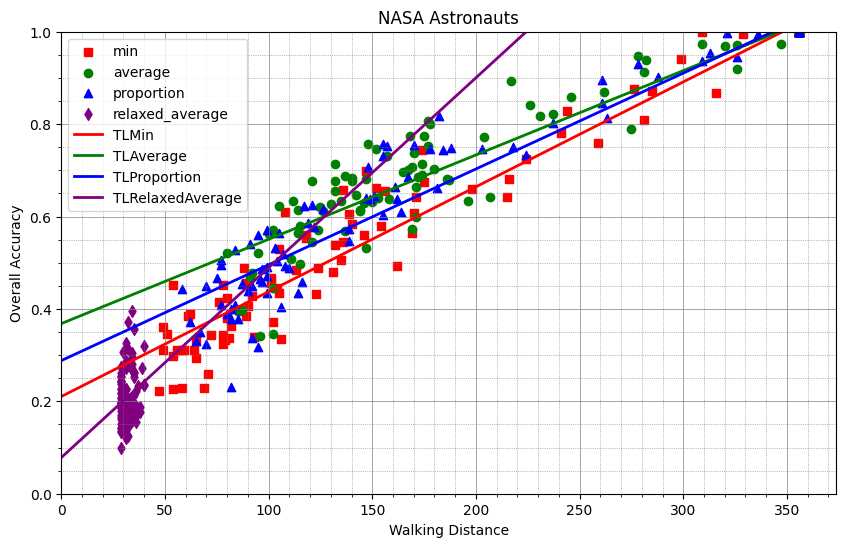

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Create a plot
plt.figure(figsize=(10, 6))

# Plot each scatter plot with different shapes
plt.scatter(walking_distance_min, accuracy_axis_y_min, label='min', color='red', marker='s')
plt.scatter(walking_distance_average, accuracy_axis_y_average, label='average', color='green', marker='o')
plt.scatter(walking_distance_proportion, accuracy_axis_y_proportion, label='proportion', color='blue', marker='^')
plt.scatter(walking_distance_relaxed_average, accuracy_axis_y_relaxed_average, label='relaxed_average', color='purple', marker='d')

# Plot trend lines
coefficients_min = np.polyfit(walking_distance_min, accuracy_axis_y_min, 1)
trend_line_min = np.poly1d(coefficients_min)
x_range_min = np.linspace(0, max(walking_distance_min), 2)
plt.plot(x_range_min, trend_line_min(x_range_min), label='TLMin', color='red', linewidth=2)

coefficients_average = np.polyfit(walking_distance_average, accuracy_axis_y_average, 1)
trend_line_average = np.poly1d(coefficients_average)
x_range_average = np.linspace(0, max(walking_distance_average), 2)
plt.plot(x_range_average, trend_line_average(x_range_average), label='TLAverage', color='green', linewidth=2)

coefficients_proportion = np.polyfit(walking_distance_proportion, accuracy_axis_y_proportion, 1)
trend_line_proportion = np.poly1d(coefficients_proportion)
x_range_proportion = np.linspace(0, max(walking_distance_proportion), 2)
plt.plot(x_range_proportion, trend_line_proportion(x_range_proportion), label='TLProportion', color='blue', linewidth=2)

coefficients_relaxed_average = np.polyfit(walking_distance_relaxed_average, accuracy_axis_y_relaxed_average, 1)
trend_line_relaxed_average = np.poly1d(coefficients_relaxed_average)
# Adjust x_range to extend to y=1
x_range_relaxed_average = np.linspace(0, (1 - trend_line_relaxed_average[0]) / coefficients_relaxed_average[0], 2)
plt.plot(x_range_relaxed_average, trend_line_relaxed_average(x_range_relaxed_average), label='TLRelaxedAverage', color='purple', linewidth=2)

# Customize grid
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='gray')

# Set the x-axis and y-axis division
plt.xticks(np.arange(0, 361, 50))
plt.yticks(np.arange(0, 1.2, 0.2))

# Set the x-axis to start at 0 and y-axis to max at 1
plt.xlim(left=0)
plt.ylim(top=1)
plt.ylim(bottom=0)

# Add title and labels
plt.title('NASA Astronauts')
plt.xlabel('Walking Distance')
plt.ylabel('Overall Accuracy')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [110]:
data_set1 = pd.read_csv("Forbes_2023_Mini.csv")
data_set1 = data_set1.sort_values(by="ranking")  # Sort by Rank in ascending order (richest first)
top_526 = data_set1.head(526)
forbes_richest = []


accepted_countries = {"China": 0, "Other": 1}
for i in range(526):
  curr_item = Item(top_526.iloc[i].country, top_526.iloc[i].netWorth,  top_526.iloc[i].personName)
  if top_526.iloc[i].country not in accepted_countries:
    curr_item.category = "Other"

  curr_item.category = accepted_countries[curr_item.category]
  forbes_richest.append(curr_item)


CHINA = 76
OTHER = 450


algo1_full = algorithm_1(forbes_richest, 6, 2, [3, 3], [3, 3])


sum_full = 0
walking_distance_full = []
accuracy_axis_y_full = []

for i in range(6):
  sum_full += algo1_full[i].score

for i in range(100):
  random.shuffle(forbes_richest)
  full_combined = algorithm_2(forbes_richest, 6, 526, 2, [3, 3], [3, 3], [CHINA, OTHER])
  full = full_combined[0]
  walking_distance_full.append(full_combined[1])

  min_full = 0
  sum_algo2_full = 0
  for i in range(6):
    min_full = min(full[i].score, min_full)
    sum_algo2_full += full[i].score

  accuracy_full = (sum_algo2_full - 20 * min_full) / (sum_full - 20 * min_full)

  accuracy_axis_y_full.append(accuracy_full)





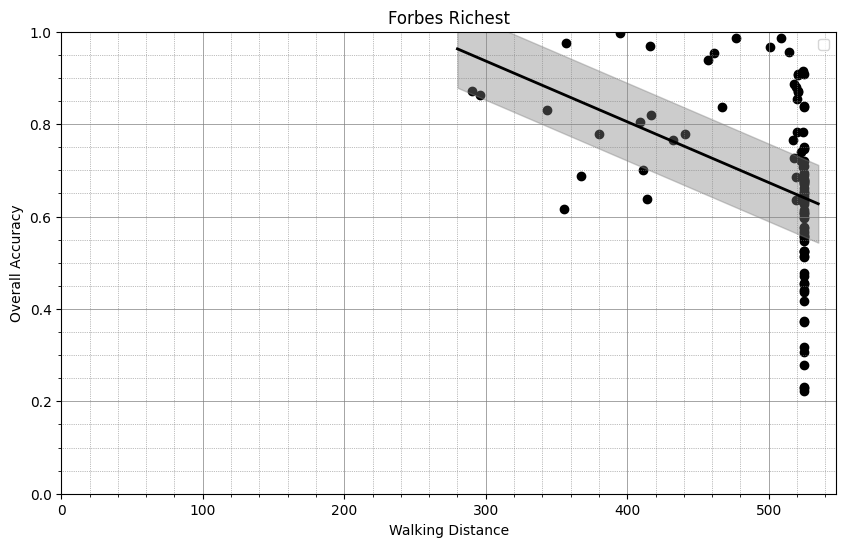

In [114]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

plt.scatter(walking_distance_full, accuracy_axis_y_full, color='black')

# Fit polynomial coefficients
coefficients_min = np.polyfit(walking_distance_full, accuracy_axis_y_full, 1)
trend_line_min = np.poly1d(coefficients_min)

# Define x range for plotting
x_range_min = np.linspace(min(walking_distance_full) - 10, max(walking_distance_full) + 10, 100)

# Plot trend line with adjusted range
plt.plot(x_range_min, trend_line_min(x_range_min), color='black', linewidth=2)

# Calculate standard error of the estimate
y_pred = trend_line_min(walking_distance_full)
y_err = accuracy_axis_y_full - y_pred
mean_error = np.mean(np.abs(y_err))
std_error = np.std(y_err) / 2

# Shade the area around the trend line (confidence interval)
plt.fill_between(x_range_min, trend_line_min(x_range_min) - std_error, trend_line_min(x_range_min) + std_error, color='gray', alpha=0.4)


# Customize grid
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='gray')

# Set the x-axis and y-axis division
plt.xticks(np.arange(0, 501, 100))
plt.yticks(np.arange(0, 1.2, 0.2))

plt.xlim(left=0)
plt.ylim(bottom=0, top=1)

plt.title('Forbes Richest')
plt.xlabel('Walking Distance')
plt.ylabel('Overall Accuracy')

plt.legend()
plt.show()


In [119]:
data_set1 = pd.read_csv("Forbes_2023_Mini.csv")
data_set1 = data_set1.sort_values(by="ranking")  # Sort by Rank in ascending order (richest first)
top_526 = data_set1.head(526)
forbes_richest = []


accepted_countries = {"China": 0, "Other": 1}
for i in range(526):
  curr_item = Item(top_526.iloc[i].country, top_526.iloc[i].netWorth,  top_526.iloc[i].personName)
  if top_526.iloc[i].country not in accepted_countries:
    curr_item.category = "Other"

  curr_item.category = accepted_countries[curr_item.category]
  forbes_richest.append(curr_item)


CHINA = 76
OTHER = 450


algo1_quarter = algorithm_1(forbes_richest, 6, 2, [3, 3], [3, 3])


sum_quarter = 0
walking_distance_quarter = []
accuracy_axis_y_quarter = []

for i in range(6):
  sum_quarter += algo1_quarter[i].score

for i in range(100):
  random.shuffle(forbes_richest)
  quarter_combined = algorithm_2(forbes_richest, 6, 526, 2, [3, 3], [3, 3], [CHINA, OTHER])
  quarter = quarter_combined[0]
  walking_distance_quarter.append(quarter_combined[1])

  min_quarter = 0
  sum_algo2_quarter = 0
  for i in range(6):
    min_quarter = min(quarter[i].score, min_quarter)
    sum_algo2_quarter += quarter[i].score

  accuracy_quarter = (sum_algo2_quarter - 20 * min_quarter) / (sum_quarter - 20 * min_quarter)

  accuracy_axis_y_quarter.append(accuracy_quarter)





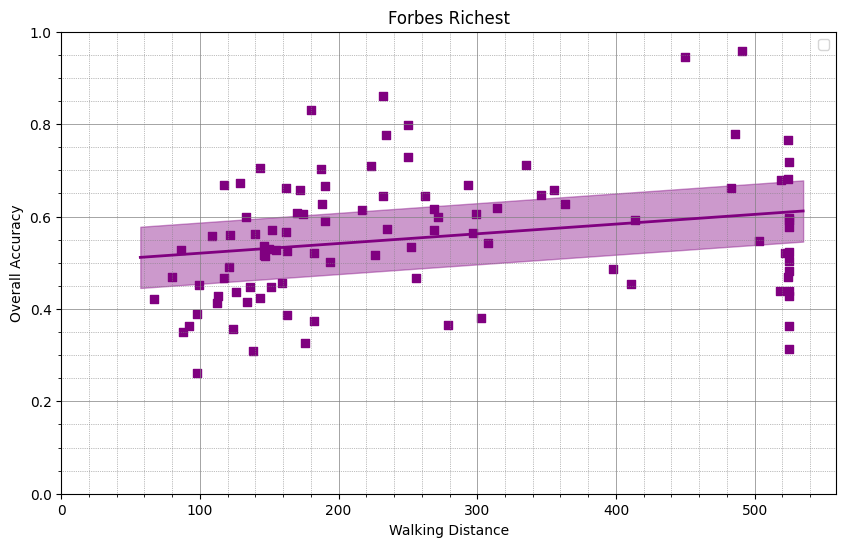

In [120]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

plt.scatter(walking_distance_quarter, accuracy_axis_y_quarter, color='purple', marker = 's')

# Fit polynomial coefficients
coefficients_min = np.polyfit(walking_distance_quarter, accuracy_axis_y_quarter, 1)
trend_line_min = np.poly1d(coefficients_min)

# Define x range for plotting
x_range_min = np.linspace(min(walking_distance_quarter) - 10, max(walking_distance_quarter) + 10, 100)

# Plot trend line with adjusted range
plt.plot(x_range_min, trend_line_min(x_range_min), color='purple', linewidth=2)

# Calculate standard error of the estimate
y_pred = trend_line_min(walking_distance_quarter)
y_err = accuracy_axis_y_quarter - y_pred
mean_error = np.mean(np.abs(y_err))
std_error = np.std(y_err) / 2

# Shade the area around the trend line (confidence interval)
plt.fill_between(x_range_min, trend_line_min(x_range_min) - std_error, trend_line_min(x_range_min) + std_error, color='purple', alpha=0.4)


# Customize grid
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='gray')

# Set the x-axis and y-axis division
plt.xticks(np.arange(0, 501, 100))
plt.yticks(np.arange(0, 1.2, 0.2))

plt.xlim(left=0)
plt.ylim(bottom=0, top=1)

plt.title('Forbes Richest')
plt.xlabel('Walking Distance')
plt.ylabel('Overall Accuracy')

plt.legend()
plt.show()


In [131]:
data_set1 = pd.read_csv("Forbes_2023_Mini.csv")
data_set1 = data_set1.sort_values(by="ranking")  # Sort by Rank in ascending order (richest first)
top_526 = data_set1.head(526)
forbes_richest = []


accepted_countries = {"China": 0, "Other": 1}
for i in range(526):
  curr_item = Item(top_526.iloc[i].country, top_526.iloc[i].netWorth,  top_526.iloc[i].personName)
  if top_526.iloc[i].country not in accepted_countries:
    curr_item.category = "Other"

  curr_item.category = accepted_countries[curr_item.category]
  forbes_richest.append(curr_item)


CHINA = 76
OTHER = 450


algo1_sixteenth = algorithm_1(forbes_richest, 6, 2, [3, 3], [3, 3])


sum_sixteenth = 0
walking_distance_sixteenth = []
accuracy_axis_y_sixteenth = []

for i in range(6):
  sum_sixteenth += algo1_sixteenth[i].score

for i in range(100):
  random.shuffle(forbes_richest)
  sixteenth_combined = algorithm_2(forbes_richest, 6, 526, 2, [3, 3], [3, 3], [CHINA, OTHER])
  sixteenth = sixteenth_combined[0]
  walking_distance_sixteenth.append(sixteenth_combined[1])

  min_sixteenth = 0
  sum_algo2_sixteenth = 0
  for i in range(6):
    min_sixteenth = min(sixteenth[i].score, min_sixteenth)
    sum_algo2_sixteenth += sixteenth[i].score

  accuracy_sixteenth = (sum_algo2_sixteenth - 20 * min_sixteenth) / (sum_sixteenth - 20 * min_sixteenth)

  accuracy_axis_y_sixteenth.append(accuracy_sixteenth)





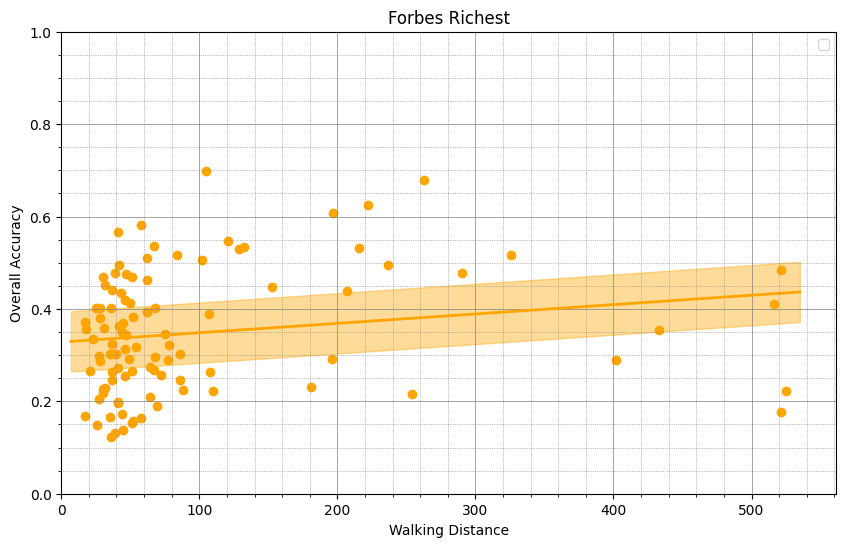

In [134]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

plt.scatter(walking_distance_sixteenth, accuracy_axis_y_sixteenth, color='orange')

# Fit polynomial coefficients
coefficients_min = np.polyfit(walking_distance_sixteenth, accuracy_axis_y_sixteenth, 1)
trend_line_min = np.poly1d(coefficients_min)

# Define x range for plotting
x_range_min = np.linspace(min(walking_distance_sixteenth) - 10, max(walking_distance_sixteenth) + 10, 100)

# Plot trend line with adjusted range
plt.plot(x_range_min, trend_line_min(x_range_min), color='orange', linewidth=2)

# Calculate standard error of the estimate
y_pred = trend_line_min(walking_distance_sixteenth)
y_err = accuracy_axis_y_sixteenth - y_pred
mean_error = np.mean(np.abs(y_err))
std_error = np.std(y_err) / 2

# Shade the area around the trend line (confidence interval)
plt.fill_between(x_range_min, trend_line_min(x_range_min) - std_error, trend_line_min(x_range_min) + std_error, color='orange', alpha=0.4)


# Customize grid
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='gray')

# Set the x-axis and y-axis division
plt.xticks(np.arange(0, 501, 100))
plt.yticks(np.arange(0, 1.2, 0.2))

plt.xlim(left=0)
plt.ylim(bottom=0, top=1)

plt.title('Forbes Richest')
plt.xlabel('Walking Distance')
plt.ylabel('Overall Accuracy')

plt.legend()
plt.show()
